In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ta
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("..") 
from utils import pull_data
from utils import plot_data_line_chart
from utils import create_pred_df
from utils import naive_random_walk
from utils import get_lag_values
from utils import xgboost
from utils import plot_oos

In [2]:
display(HTML("<h1>Stock Analysis App... Voila</h1>"))

In [ ]:
##USER INPUTS
ticker = "CAVA"
print("Looking at Ticker: ", ticker)
days_of_trading_to_predict = 100
xgboost_weight = .85 # More stable
naive_weight = .15 # More random

Looking at Ticker:  MS


In [4]:

df = pull_data(ticker)
df = df.reset_index()
df['Date'] = df['Date'].dt.tz_localize(None).dt.date


## Plotting Historical Stock Price

In [5]:
## Ploting History 
# Create interactive date range pickers 
start_date_picker = widgets.DatePicker(description="Start Date", value=df['Date'].min())
end_date_picker = widgets.DatePicker(description="End Date", value=df['Date'].max())


# Use widgets.interactive correctly
interactive_plot = widgets.interactive(
    plot_data_line_chart, 
    df=widgets.fixed(df), 
    start_date=start_date_picker, 
    end_date=end_date_picker
)

interactive_plot

interactive(children=(DatePicker(value=datetime.date(2022, 4, 21), description='Start Date', step=1), DatePick…

## Plotting RSI (Relative Strength Index)

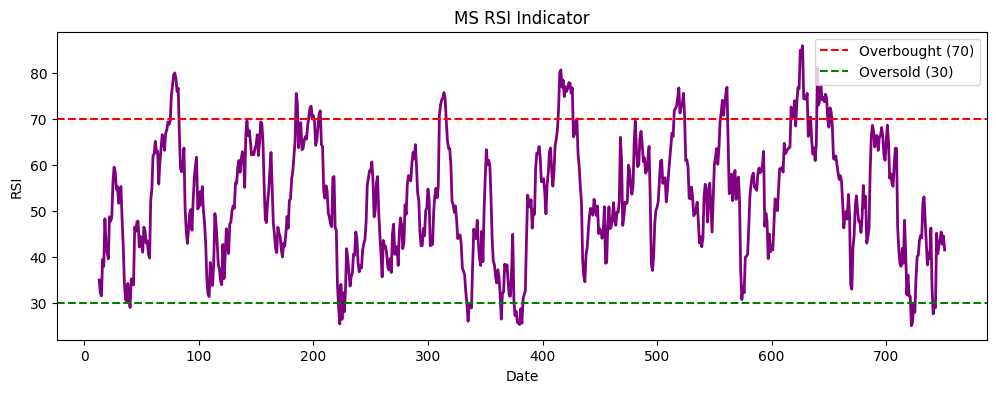

In [6]:
##Overbought - potentially overvalued
##Oversold - potentially undervalued 

df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

macd_indicator = ta.trend.MACD(df['Close'])
df['MACD'] = macd_indicator.macd()
df['MACD_Signal'] = macd_indicator.macd_signal()

plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x=df.index, y='RSI', color='purple', linewidth=2)
plt.axhline(70, color='red', linestyle='dashed', label="Overbought (70)")
plt.axhline(30, color='green', linestyle='dashed', label="Oversold (30)")
plt.title(f'{ticker} RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

## Predicting Price (Xgboost + Random Walk Ensemble)

Predicting 100 trading days out


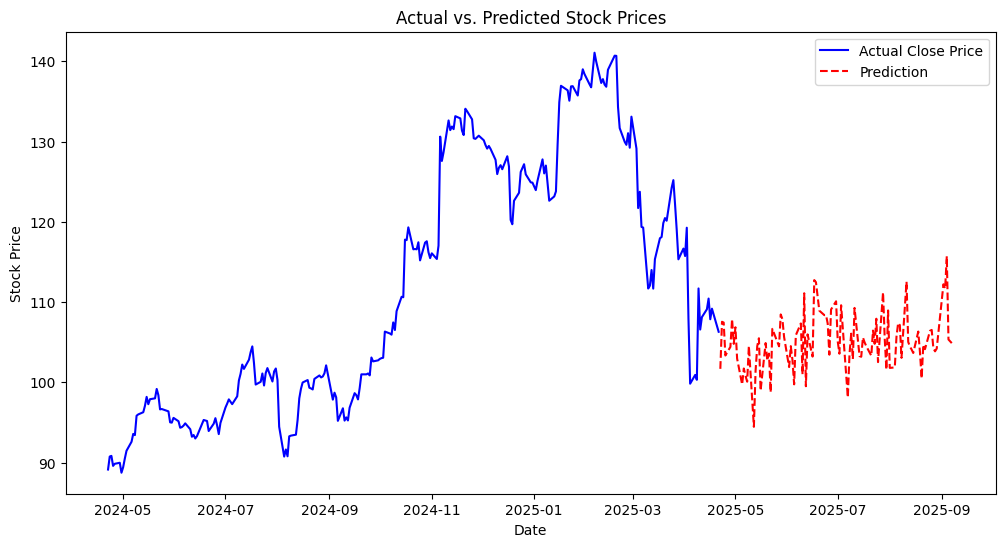

In [7]:
print(f'Predicting {days_of_trading_to_predict} trading days out')
pred_df = create_pred_df(df,days_of_trading_to_predict)

##Creating predictions
preds_naive = naive_random_walk(df, pred_df)
preds_xgboost = xgboost(df,pred_df,days_of_trading_to_predict)

## plotting predictions
pred_df['preds'] = (xgboost_weight * preds_xgboost['preds']) + (naive_weight * preds_naive['preds'])
plot_oos(df,pred_df)

In [8]:
display(HTML("<h3>Predictions:</h3>"))

In [9]:
pd.set_option('display.max_columns', None)
pred_df.set_index('dt').T

dt,2025-04-22,2025-04-23,2025-04-24,2025-04-25,2025-04-28,2025-04-29,2025-04-30,2025-05-01,2025-05-02,2025-05-05,2025-05-06,2025-05-07,2025-05-08,2025-05-09,2025-05-12,2025-05-13,2025-05-14,2025-05-15,2025-05-16,2025-05-19,2025-05-20,2025-05-21,2025-05-22,2025-05-23,2025-05-27,2025-05-28,2025-05-29,2025-05-30,2025-06-02,2025-06-03,2025-06-04,2025-06-05,2025-06-06,2025-06-09,2025-06-10,2025-06-11,2025-06-12,2025-06-13,2025-06-16,2025-06-17,2025-06-18,2025-06-20,2025-06-23,2025-06-24,2025-06-25,2025-06-26,2025-06-27,2025-06-30,2025-07-01,2025-07-02,2025-07-03,2025-07-07,2025-07-08,2025-07-09,2025-07-10,2025-07-11,2025-07-14,2025-07-15,2025-07-16,2025-07-17,2025-07-18,2025-07-21,2025-07-22,2025-07-23,2025-07-24,2025-07-25,2025-07-28,2025-07-29,2025-07-30,2025-07-31,2025-08-01,2025-08-04,2025-08-05,2025-08-06,2025-08-07,2025-08-08,2025-08-11,2025-08-12,2025-08-13,2025-08-14,2025-08-15,2025-08-18,2025-08-19,2025-08-20,2025-08-21,2025-08-22,2025-08-25,2025-08-26,2025-08-27,2025-08-28,2025-08-29,2025-09-02,2025-09-03,2025-09-04,2025-09-05,2025-09-08
preds,101.68129,107.546172,107.445855,103.341852,104.416767,107.8857,104.793479,106.86136,102.959525,99.721349,101.723105,100.809304,100.083431,104.523723,94.454378,101.411722,104.507371,105.491859,98.968504,104.893557,102.718127,103.579083,98.765577,106.665595,104.488449,108.462518,107.877562,105.659334,101.902986,104.510296,102.766117,99.747585,105.865067,107.339263,100.989205,111.102364,99.512139,105.974234,103.209393,112.7443,112.473402,108.934636,108.375549,108.380127,107.335893,103.445644,109.07783,110.100129,105.068027,103.57019,109.607292,98.107507,103.511216,106.064954,102.891752,109.274324,103.265537,103.184533,105.588872,104.978325,104.506205,103.311899,106.447987,104.801225,107.925855,102.522608,111.220993,105.417826,101.587755,108.958744,101.79801,101.854289,105.678163,107.394279,107.130998,103.050897,112.548132,105.035941,104.462229,104.096851,103.657165,106.326086,103.760599,100.483131,104.700433,104.132249,106.42507,106.527124,104.240622,103.86316,104.212395,112.223666,111.671944,115.721121,105.339753,104.646166
